# Author: Jagjeet Singh

## TASK :1 

## Predict the percentage of an student based on the no. of study hours.

### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### loading dataset

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### getting information of the dataset like data type of columns 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### statistic description of the data

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### plotting the given data

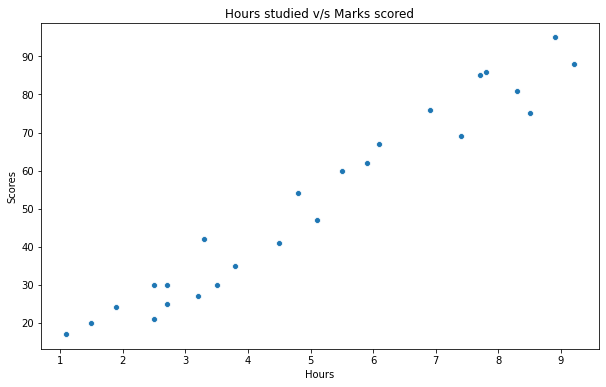

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title('Hours studied v/s Marks scored')
plt.show()

### checking for duplicated values

In [7]:
df.duplicated().any()

False

### checking pearson correlation of Hours with respect to scores 


### p-value tells us how significant our correlation is, 

In [8]:
pearson_coef,p_value=pearsonr(df['Hours'],df['Scores'])
print(f'The Pearson Correlation Coefficient is {pearson_coef:.2f} with a P-value of P={p_value}')

The Pearson Correlation Coefficient is 0.98 with a P-value of P=9.132624467459842e-17


### storing independent columns in x and dependent variable or target variable in y

In [24]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### splitting the data into training and testing,so that accuracy of the model could be predicted

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### creating object of the linear regression model

In [26]:
model=LinearRegression()

### training the model on the given dataset

In [27]:
model.fit(x_train,y_train)

LinearRegression()

### model equation

### y=m*x+c

y is dependent variable
<br>
m is the slope
<br>
x is independent variable
<br>
c is intercept

In [28]:
line=model.coef_[0]*x+model.intercept_
print(f'slope of the trained model is :{model.coef_[0]:.3f} ,and y intercept is :{model.intercept_:.3f}')
print(f'eqn: y={model.coef_[0]:.3f}*x+{model.intercept_:.3f}')

slope of the trained model is :9.789 ,and y intercept is :2.371
eqn: y=9.789*x+2.371


### plotting the given data and the linear eqn predicted by model

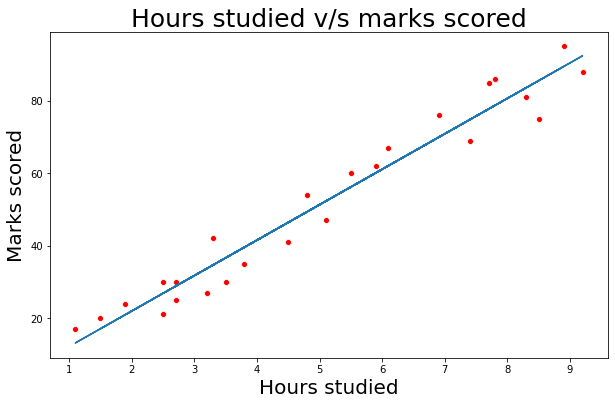

In [29]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x='Hours',y='Scores',color='r',data=df)
ax.set_xlabel('Hours studied',fontdict={ 'fontsize': 20})
ax.set_ylabel('Marks scored',fontdict={'fontsize': 20})
plt.plot(x,line)
ax.set_title('Hours studied v/s marks scored',fontdict={'fontsize': 25})
plt.show()

### getting predictions for the test data

In [30]:
y_pred=model.predict(x_test)

### getting the accuracy of model

In [31]:
r2 = r2_score(y_test, y_pred)
print("R squre value of the model is: %.9f" %r2)

R squre value of the model is: 0.956821110


### plotting dist plot for training and testing data to get an idea of generalization error

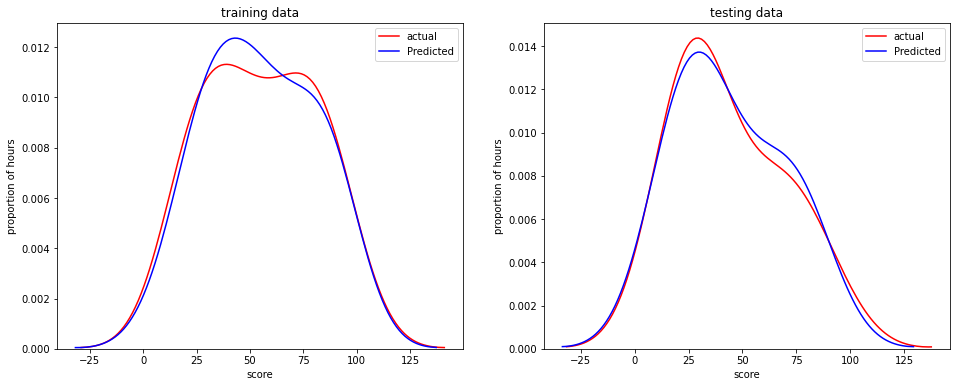

In [45]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(y_train,hist=False,color='r',label='actual',ax=ax[0])
sns.distplot(model.predict(x_train),hist=False,color='b',label='Predicted',ax=ax[0])
ax[0].set_title('training data')
ax[0].set_xlabel('score')
ax[0].set_ylabel('proportion of hours')
sns.distplot(y_test,hist=False,color='r',label='actual',ax=ax[1])
sns.distplot(model.predict(x_test),hist=False,color='b',label='Predicted',ax=ax[1])
ax[1].set_title('testing data')
ax[1].set_xlabel('score')
ax[1].set_ylabel('proportion of hours')
plt.show()

### The model performs well on training data as well as test data as the graph for both is almost the same

#### Q:What will be predicted score if a student studies for 9.25 hrs/ day?

In [46]:
marks=model.predict([[9.25]])
print(f'A student studing 9.25 hrs/day might score {marks[0]:.2f}% marks')

A student studing 9.25 hrs/day might score 92.92% marks
